In [1]:
# Import statements
import numpy as np
import time
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
from queue import PriorityQueue
import random as random

In [2]:
print('****************************** Shortest Path Algorithms ******************************')
print('1. Breadth-First Search')
print('2. The Bellman-Ford Algorithm')
print('3. Dijkstra’s algorithm')
choice = int(input('Select an Algorithm for testing (Enter choice): '))

****************************** Shortest Path Algorithms ******************************
1. Breadth-First Search
2. The Bellman-Ford Algorithm
3. Dijkstra’s algorithm
Select an Algorithm for testing (Enter choice): 2


In [3]:
n = int(input('Enter Input size: '))

Enter Input size: 7


In [4]:
def shortest_path_bfs(graph, node1, node2):
    path_list = [[node1]]
    path_index = 0
    # To keep track of previously visited nodes
    previous_nodes = {node1}
    if node1 == node2:
        return path_list[0]
        
    while path_index < len(path_list):
        current_path = path_list[path_index]
        last_node = current_path[-1]
        next_nodes = graph[last_node]
        # Search goal node
        if node2 in next_nodes:
            current_path.append(node2)
            return current_path
        # Add new paths
        for next_node in next_nodes:
            if not next_node in previous_nodes:
                new_path = current_path[:]
                new_path.append(next_node)
                path_list.append(new_path)
                # To avoid backtracking
                previous_nodes.add(next_node)
        # Continue to next path in list
        path_index += 1
    # No path is found
    return []

def bfs(graph, start, goal):
    explored = []
     
    # Queue for traversing the
    # graph in the BFS
    queue = [[start]]
     
    # If the desired node is
    # reached
    if start == goal:
        print("Same Node")
        return
     
    # Loop to traverse the graph
    # with the help of the queue
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # Condition to check if the
        # current node is not visited
        if node not in explored:
            if node in graph:
                neighbours = graph[node]
            else:
                neighbours = []
            # Loop to iterate over the
            # neighbours of the node
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                # Condition to check if the
                # neighbour node is the goal
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return
            explored.append(node)
 
    # Condition when the nodes
    # are not connected
    print("So sorry, but a connecting path doesn't exist :(")
    return

In [12]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices # No. of vertices
        self.graph = []
 
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
         
    # utility function used to print the solution
    def printArr(self, dist):
        print("Vertex Distance from Source")
        for i in range(self.V):
            print("{0}\t\t{1}".format(i, dist[i]))
    
    def BellmanFord(self, src):
 
        dist = [float("Inf")] * self.V
        print(src)
        dist[src] = 0
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                        dist[v] = dist[u] + w
 
        for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                        print("Graph contains negative weight cycle")
                        return
                         
        # print all distance
        self.printArr(dist)

In [13]:
class Graph_2:
    def __init__(self, num_of_vertices):
        self.v = num_of_vertices
        self.edges = [[-1 for i in range(num_of_vertices)] for j in range(num_of_vertices)]
        self.visited = []
    def add_edge(self, u, v, weight):
        self.edges[u][v] = weight
        self.edges[v][u] = weight
    def dijkstra(self, start_vertex):
        D = {v:float('inf') for v in range(self.v)}
        D[start_vertex] = 0
    
        pq = PriorityQueue()
        pq.put((0, start_vertex))
    
        while not pq.empty():
            (dist, current_vertex) = pq.get()
            self.visited.append(current_vertex)
    
            for neighbor in range(self.v):
                if self.edges[current_vertex][neighbor] != -1:
                    distance = self.edges[current_vertex][neighbor]
                    if neighbor not in self.visited:
                        old_cost = D[neighbor]
                        new_cost = D[current_vertex] + distance
                        if new_cost < old_cost:
                            pq.put((new_cost, neighbor))
                            D[neighbor] = new_cost
        return D

In [14]:
x = list(np.random.randint(low = 0,high = n - 1, size = 3*n))
y = list(np.random.randint(low = 0,high = n - 1, size = 3*n))
weights = list(np.random.randint(low = -1,high = 1000, size = 5*n))

In [15]:
start = random.randint(0, n)
end = (n - start)
if choice == 1: # BFS
    graph = {}
    for i in range(len(x)):
        if x[i] in graph:
            graph[x[i]].append(y[i])
        else:
            graph[x[i]] = [y[i]]
#     shortest_path_bfs(graph, start, end
    print('BFS Shortest path')
    start_time = time.time()
    bfs(graph, start, end)
elif choice == 2: # BF
    graph = Graph(n)
    for i in range(len(x)):
        graph.addEdge(x[i], y[i], weights[i])
    print('Bellman Ford Shortest path')
    start_time = time.time()
    graph.BellmanFord(start)
else: # Dijkstra's
    graph = Graph_2(n)
    for i in range(len(x)):
        graph.add_edge(x[i], y[i], weights[i])
    print('Dijkstra Shortest path')
    start_time = time.time()
    print(graph.dijkstra(start))
time_taken = (time.time() - start_time)
print("--- %s seconds ---" % (time_taken))

Bellman Ford Shortest path
8
Vertex Distance from Source
0		1485
1		1744
2		1569
3		1686
4		2124
5		1713
6		610
7		1462
8		0
9		inf
--- 0.0019795894622802734 seconds ---


In [16]:
# Comparing with other algorithms
if choice == 1:
    graph = Graph(n)
    for i in range(len(x)):
        graph.addEdge(x[i], y[i], weights[i])
    print('Bellman Ford Shortest path')
    start_time = time.time()
    graph.BellmanFord(start)
    time_taken = (time.time() - start_time)
    print("--- %s seconds ---" % (time_taken))
    
    print('Dijkstra Shortest path')
    start_time = time.time()
    graph = Graph_2(n)
    for i in range(len(x)):
        graph.add_edge(x[i], y[i], weights[i])
    print(graph.dijkstra(start))
    time_taken = (time.time() - start_time)
    print("--- %s seconds ---" % (time_taken))
elif choice == 2:
    graph = {}
    for i in range(len(x)):
        if x[i] in graph:
            graph[x[i]].append(y[i])
        else:
            graph[x[i]] = [y[i]]
#     shortest_path_bfs(graph, start, end)
    print('BFS Shortest path')
    start_time = time.time()
    bfs(graph, start, end)
    time_taken = (time.time() - start_time)
    print("--- %s seconds ---" % (time_taken))
    
    print('Dijkstra Shortest path')
    start_time = time.time()
    graph = Graph_2(n)
    for i in range(len(x)):
        graph.add_edge(x[i], y[i], weights[i])
    print(graph.dijkstra(start))
    time_taken = (time.time() - start_time)
    print("--- %s seconds ---" % (time_taken))
else:
    graph = {}
    for i in range(len(x)):
        if x[i] in graph:
            graph[x[i]].append(y[i])
        else:
            graph[x[i]] = [y[i]]
#     shortest_path_bfs(graph, start, end)
    print('BFS Shortest path')
    start_time = time.time()
    bfs(graph, start, end)
    time_taken = (time.time() - start_time)
    print("--- %s seconds ---" % (time_taken))
    
    print('Bellman Ford Shortest path')
    start_time = time.time()
    graph = Graph(n)
    for i in range(len(x)):
        graph.addEdge(x[i], y[i], weights[i])
    graph.BellmanFord(start)
    time_taken = (time.time() - start_time)
    print("--- %s seconds ---" % (time_taken))

BFS Shortest path
Shortest path =  8 6 7 2
--- 0.0009779930114746094 seconds ---
Dijkstra Shortest path
{0: 628, 1: 695, 2: 712, 3: 829, 4: 716, 5: 726, 6: 30, 7: 605, 8: 0, 9: inf}
--- 0.0010385513305664062 seconds ---


In [17]:
# Analysis for larger values of n
n = 0
start = 0
end = 0
n_list, bfs_time, bf_time, dij_time = [i for i in range(5, 25)], [], [], []
for n in n_list:
    start = random.randint(0, n)
    end = (n - start)
    x = [i for i in range(n)]
    temp = list(np.random.randint(low = 0,high = n - 1, size = 4*n))
    x.extend(temp)
    y = [i for i in range(n)]
    temp = list(np.random.randint(low = 0,high = n - 1, size = 5*n))
    y.extend(temp)
    random.shuffle(x)
    random.shuffle(y)
#     print(len(x) == len(y))
    weights = list(np.random.randint(low = -1,high = 1000, size = 5*n))
    
    graph = {}
    for i in range(len(x)):
        if x[i] in graph:
            graph[x[i]].append(y[i])
        else:
            graph[x[i]] = [y[i]]
#     shortest_path_bfs(graph, start, end)
#     print('BFS Shortest path')
    start_time = time.time()
#     print(x, graph)
    bfs(graph, start, end)
    time_taken = (time.time() - start_time)
    bfs_time.append(time_taken)
#     print("--- %s seconds ---" % (time_taken))

#     print('Bellman Ford Shortest path')
    start_time = time.time()
    graph = Graph(n)
    for i in range(len(x)):
        graph.addEdge(x[i], y[i], weights[i])
    graph.BellmanFord(start)
    time_taken = (time.time() - start_time)
    bf_time.append(time_taken)
#     print("--- %s seconds ---" % (time_taken))

#     print('Dijkstra Shortest path')
    start_time = time.time()
    graph = Graph_2(n)
    for i in range(len(x)):
        graph.add_edge(x[i], y[i], weights[i])
    graph.dijkstra(start)
    time_taken = (time.time() - start_time)
    dij_time.append(time_taken)
#     print("--- %s seconds ---" % (time_taken))

So sorry, but a connecting path doesn't exist :(
0
Vertex Distance from Source
0		0
1		713
2		695
3		194
4		1062
Shortest path =  2 4
2
Vertex Distance from Source
0		53
1		203
2		0
3		111
4		146
5		345
Shortest path =  6 3 1
6
Vertex Distance from Source
0		1406
1		1283
2		915
3		896
4		1315
5		991
6		0
Shortest path =  7 5 1
7
Vertex Distance from Source
0		711
1		1338
2		964
3		997
4		1094
5		538
6		1855
7		0
Shortest path =  6 7 3
6
Vertex Distance from Source
0		547
1		322
2		182
3		902
4		125
5		23
6		0
7		179
8		inf
Shortest path =  3 6 7
3
Vertex Distance from Source
0		527
1		106
2		1043
3		0
4		383
5		803
6		183
7		365
8		156
9		inf
Shortest path =  2 9
2
Vertex Distance from Source
0		513
1		538
2		0
3		569
4		251
5		114
6		1135
7		518
8		419
9		472
10		1311
Same Node
6
Vertex Distance from Source
0		831
1		521
2		780
3		1368
4		809
5		1621
6		0
7		1183
8		1141
9		1430
10		1316
11		1593
Shortest path =  3 7 10
3
Vertex Distance from Source
0		173
1		408
2		372
3		0
4		8
5		8

In [18]:
len(bfs_time)

20

In [19]:
len(bf_time)

20

In [20]:
len(dij_time)

20

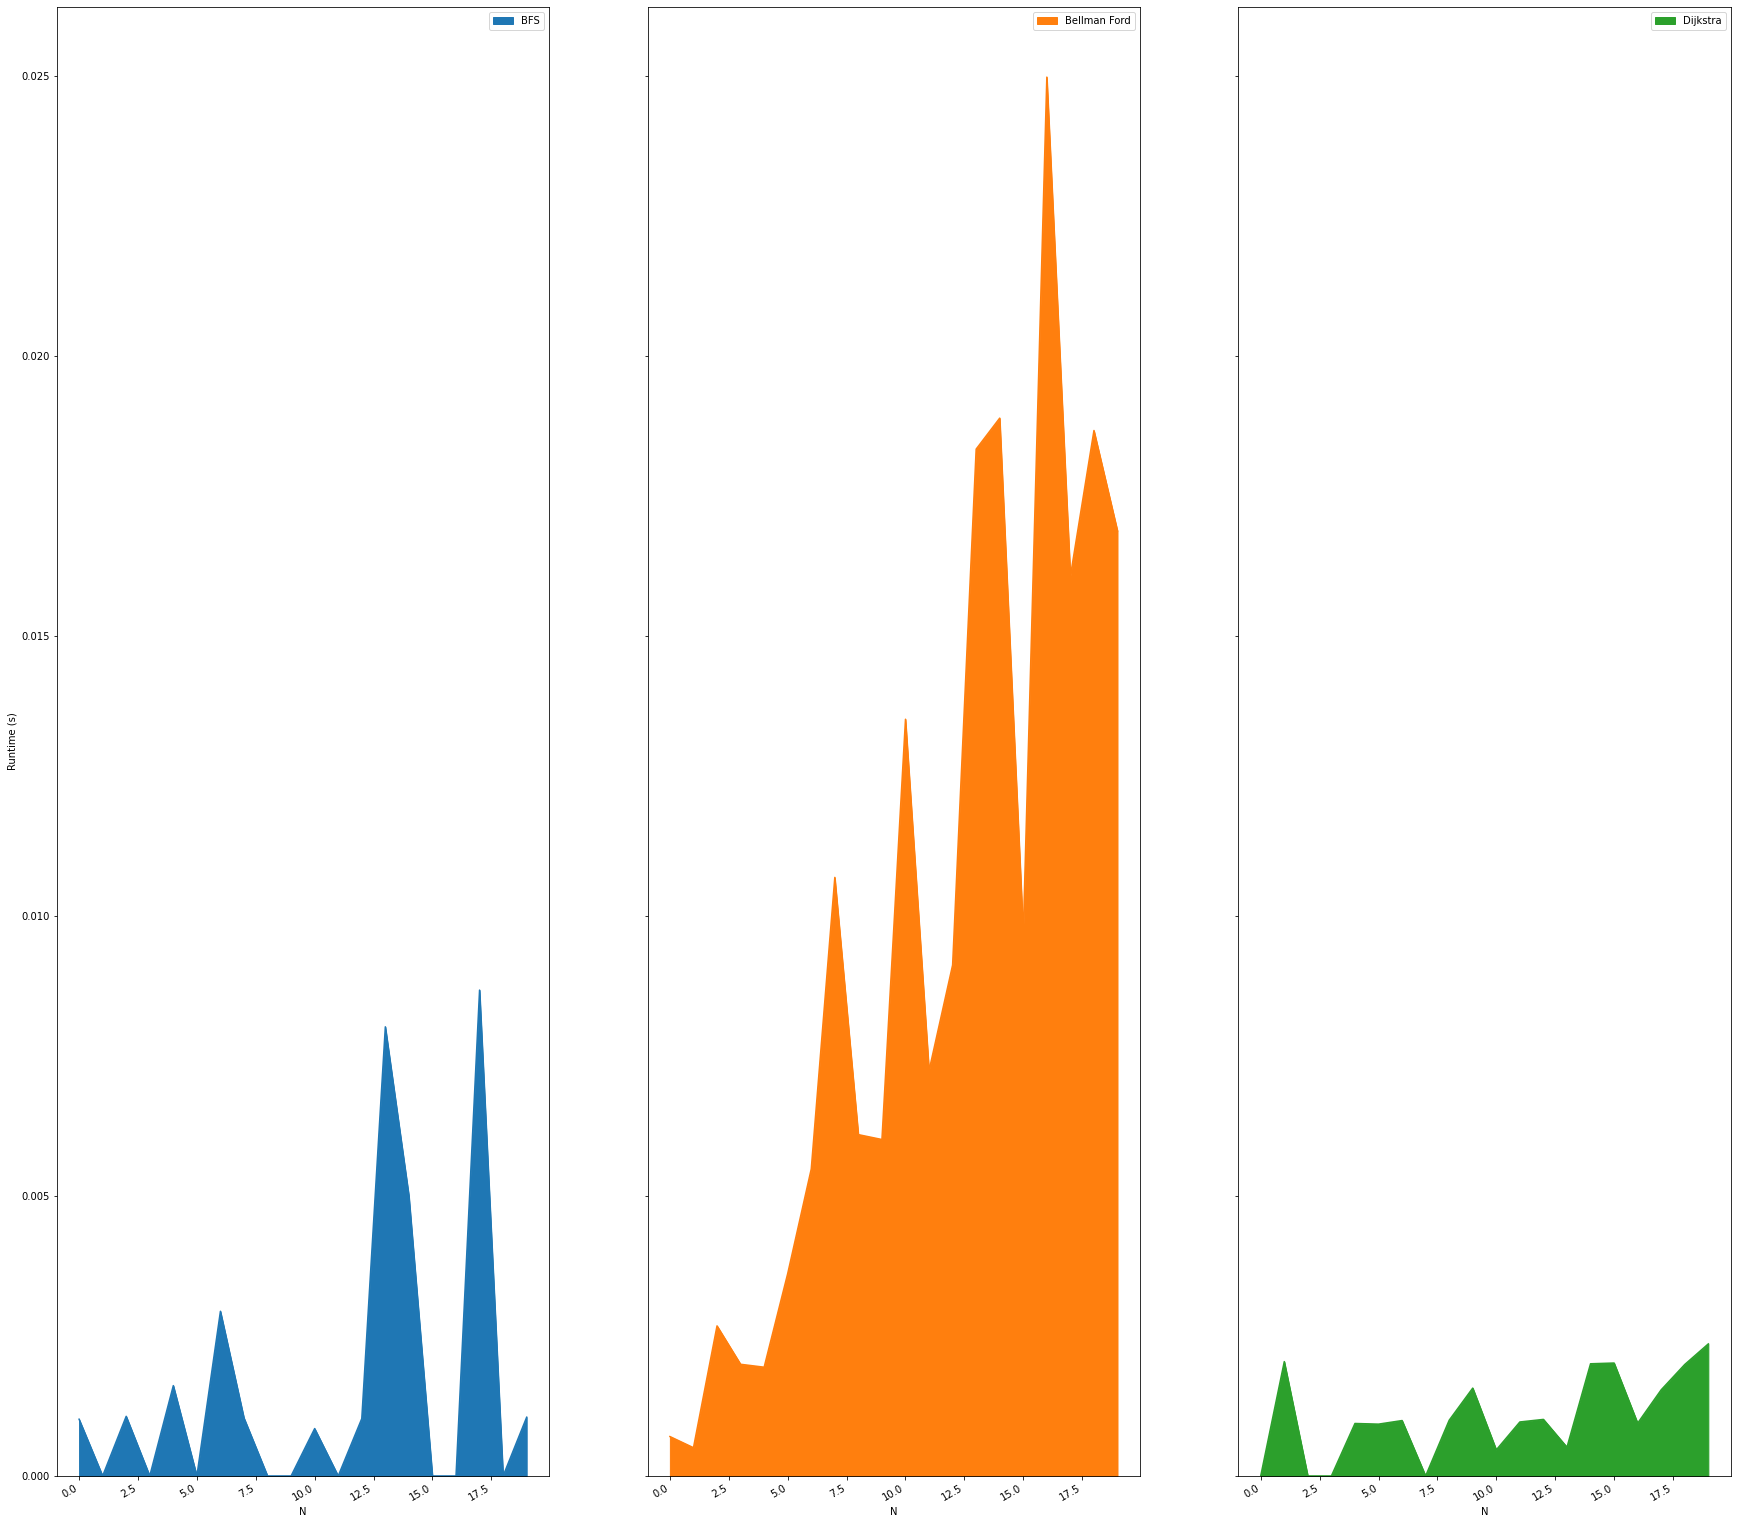

In [22]:
df = {'BFS' :  bfs_time, 'Bellman Ford' : bf_time, 'Dijkstra': dij_time}
df = pd.DataFrame(df)
df.plot(kind = 'area', subplots = True, layout = (1, 3), figsize = (30, 30), xlabel = 'N', ylabel = 'Runtime (s)', sharex = True, sharey = True)
plt.savefig('Time_vs_N.jpg', dpi=300)